This practical activity is presented as a case study. 

It helps to understand the implementation of clustering in a complete workflow.

A supermarket wants to establish a typology of its customers 

in order to send them differentiated advertisements.

# Import des données

In [51]:
df = pd.read_csv('Mall_Customers.csv')

<IPython.core.display.Javascript object>

In [52]:
df.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


In [53]:
del df['CustomerID']

In [54]:
df

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


## Propose a statistical description of this dataset:

### univariate description
### bivariate description

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Annual Income (k$)      200 non-null    int64
 1   Spending Score (1-100)  200 non-null    int64
dtypes: int64(2)
memory usage: 3.2 KB


In [56]:
df.describe()

,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


# Data preparation
Perform centering and reduction of variables, in a mall_norm dataframe.

Why is this preferable?

In scikit-learn, the StandardScaler() constructor is used to create a transformation object

the fit() method to adapt it to data 

and transform() to apply it to variables.

In [57]:
import sklearn as skl
import sklearn.preprocessing
scale_t = skl.preprocessing.StandardScaler().fit(df) 

In [58]:
new_col_names = [str(n) + "_scaled" for n in df.columns]
new_col_names

['Annual Income (k$)_scaled', 'Spending Score (1-100)_scaled']

In [59]:
df_scaled = pd.DataFrame(scale_t.transform(df), columns=new_col_names)
df_scaled

<IPython.core.display.Javascript object>

,Annual Income (k$)_scaled,Spending Score (1-100)_scaled
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


In [60]:
print(df_scaled.describe())

       Annual Income (k$)_scaled  Spending Score (1-100)_scaled
count               2.000000e+02                   2.000000e+02
mean               -6.128431e-16                  -1.121325e-16
std                 1.002509e+00                   1.002509e+00
min                -1.738999e+00                  -1.910021e+00
25%                -7.275093e-01                  -5.997931e-01
50%                 3.587926e-02                  -7.764312e-03
75%                 6.656748e-01                   8.851316e-01
max                 2.917671e+00                   1.894492e+00


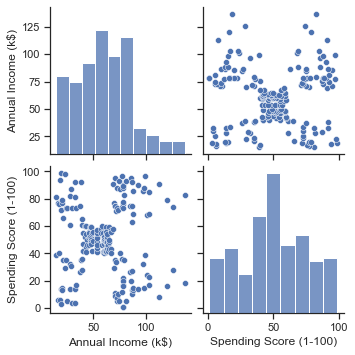

In [61]:
# Visualisation bivariée

import seaborn as sns
sns.set_theme(style="ticks")
sns.pairplot(df)

# Clustering

- The head of the marketing department believes that his clientele can be separated into 3 groups.

- Perform a clustering using the k-means algorithm (with a number of clusters set to 3).

- Perform this time the clustering with the hierarchical ascending classification algorithm, and a three-class “cut”.

- Visualize these two results and display the dendrogram obtained with the CAH (we will use the function proposed in the scikit-learn doc for displaying a dendrogram).

- Calculate the agreement between the two results (using a function that you will design, or sklearn.metrics.jaccard_score() and sklearn.metrics.rand_score()).

- Store the result of the clustering obtained with the k-means in a new variable of the mall dataframe which you will call groupID.

In [62]:
# Perform a clustering using the k-means algorithm (with a number of clusters set to 3).

import sklearn.cluster
# Clustering --> 3 classes
## kmeans
km = skl.cluster.KMeans(n_clusters=3)
km_cl = km.fit_predict(df_scaled)
km_cl

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

In [63]:
df['km_cl'] = km_cl

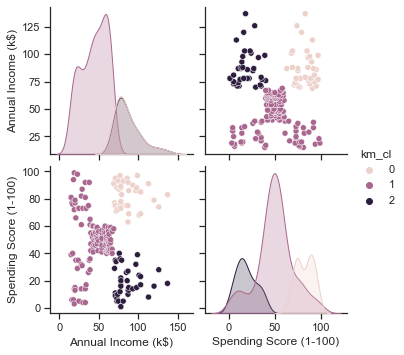

In [64]:
## Visualisation des résultats

import seaborn as sns
sns.set_theme(style="ticks")
sns.pairplot(df,hue='km_cl')

In [65]:
del df['km_cl']

In [66]:
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [67]:
# Perform this time the clustering with the hierarchical ascending classification algorithm, and a three-class “cut”.
## Classification ascendante hiérarchique
## Hierarchical ascending classification
## Agglomerative تجمعی

cah = skl.cluster.AgglomerativeClustering(n_clusters=3)
cah_cl = cah.fit_predict(df_scaled)
cah_cl

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int64)

In [68]:
df['cah_cl']=cah_cl

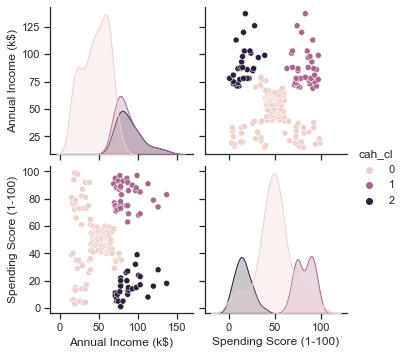

In [69]:
## Visualisation des résultats

import seaborn as sns
sns.set_theme(style="ticks")
sns.pairplot(df, hue="cah_cl")

In [70]:
del df['cah_cl']

In [71]:
# Dendrogramme de la cah
# Visualize these two results and display the dendrogram obtained with the CAH 
# (we will use the function proposed in the scikit-learn doc for displaying a dendrogram).

import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1; # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    
    linkage_matrix = np.column_stack(
    [model.children_, model.distances_, counts]
    ).astype(float)
    
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

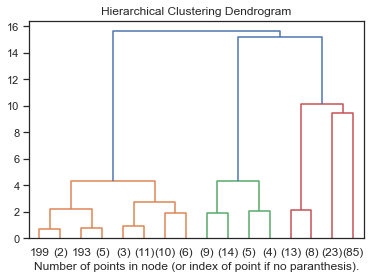

In [72]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(df_scaled)

plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model,truncate_mode="level",p=3)
plt.xlabel("Number of points in node (or index of point if no paranthesis).")
plt.show()

In [73]:
# Calculate the agreement between the two results (using a function that you will
# design, or sklearn.metrics.jaccard_score() and sklearn.metrics.rand_score()).
# Calcul maison des indices de concordance
# محاسبه داخلی شاخص های همخوانی

def concordance(l1,l2):
    n11 = n00 = n10 = n01 =0
    for i in range(len(l1)):
        for j in range(len(l2)):
            if i != j:
                if l1[i] == l1[j] and l2[i] == l2[j]:
                    n11 += 1 
                elif l1[i] == l1[j] and l2[i] != l2[j]:
                    n10 += 1
                elif l1[i] != l1[j] and l2[i] == l2[j]:
                    n01 += 1
                else:
                    n00 += 1
                    
    return {'jaccard': (n00 + n11) / (n00 + n11 + n01 + n10), 
          'rand': n11 / (n11 + n01 + n10)}
            

In [74]:
print(concordance(km_cl,cah_cl))

{'jaccard': 0.9532663316582914, 'rand': 0.903975219411461}


# Class Descriptions

- Propose a statistical description of each cluster.

- Propose an adapted visualization of the Annual income and Spending score variables (depending on the groupID variable).

Astuce

On pourra utiliser la méthode groupby() de pandas.

Trick

We can use the pandas groupby() method.

In [75]:
df['km_cl'] = km_cl
df.groupby('km_cl').describe()

Annual Income (k$)                                                 \
                   count       mean        std   min    25%   50%   75%   
km_cl                                                                     
0                   39.0  86.538462  16.312485  69.0  75.50  79.0  95.0   
1                  123.0  44.154472  16.037882  15.0  30.00  46.0  59.5   
2                   38.0  87.000000  16.271348  70.0  76.25  80.0  96.0   

             Spending Score (1-100)                                           \
         max                  count       mean        std   min    25%   50%   
km_cl                                                                          
0      137.0                   39.0  82.128205   9.364489  63.0  74.50  83.0   
1       69.0                  123.0  49.829268  19.694265   3.0  42.00  50.0   
2      137.0                   38.0  18.631579  10.915947   1.0  10.25  16.5   

                    
         75%   max  
km_cl               
0      90.00  97.0  
1      58.50  99.0  
2      26.75  40.0

# Evaluation and optimal number of classes

- Evaluate the clustering result:
    - By calculating the intraclass inertia
    - By calculating the coefficients of silhouettes, and displaying the associated diagram
    
What do you think ?

inertia = Property that bodies have of not being able by themselves to change the state of rest or motion in which they find themselves.

In [76]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

inerties = []
silhouettes = []

for n in range(2,15):
    km = skl.cluster.KMeans(n_clusters = n).fit(df_scaled)
    inerties.append(km.inertia_)
    silhouettes.append(silhouette_score(df, km.labels_))


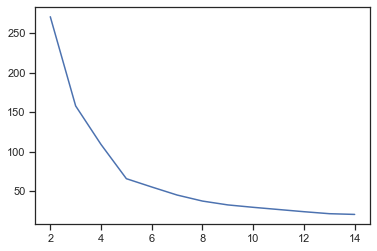

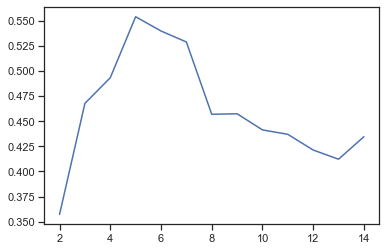

In [77]:
plt.plot(list(range(2,15)), inerties)
plt.show()
plt.plot(list(range(2,15)), silhouettes)
plt.show()

# Let's look for a better partitioning by determining the optimal number of classes.

- Perform the calculation of the silhouette score for each possible value and display the evolution of the silhouette score.

- Same thing with the elbow method.

- What do these two graphs suggest to you?

# Cherchons un meilleur partitionnement en déterminant le nombre optimal de classes.

- Effectuer le calcul du score de silhouette pour chaque valeur de  possible et afficher l’évolution du score de silhouette.

- Même chose avec la méthode elbow.

- Que vous suggèrent ces deux graphiques ?

In [78]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [79]:
X = df
del X['km_cl']
X = X.to_numpy()
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

For n_clusters = 2 The average silhouette_score is : 0.2968969162503008
For n_clusters = 3 The average silhouette_score is : 0.46761358158775435
For n_clusters = 4 The average silhouette_score is : 0.4931963109249047
For n_clusters = 5 The average silhouette_score is : 0.553931997444648
For n_clusters = 6 The average silhouette_score is : 0.5376203956398481


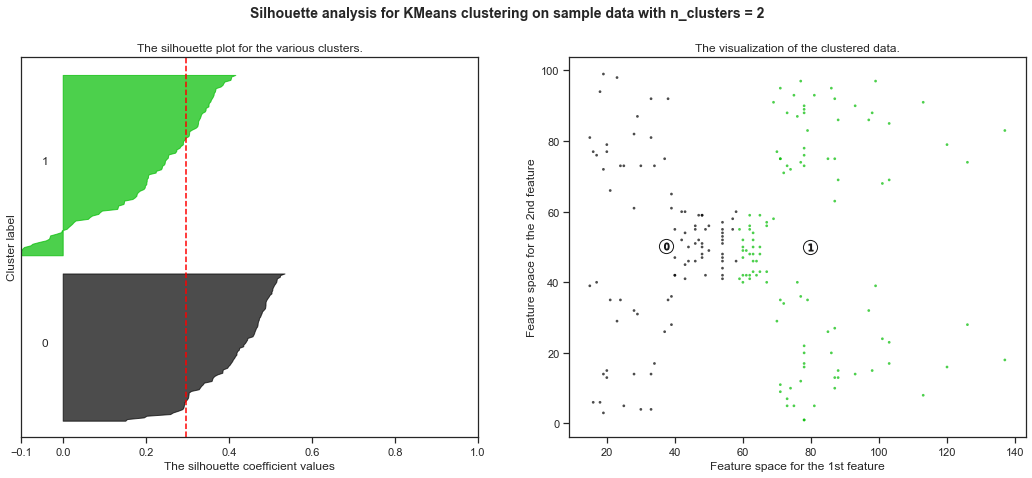

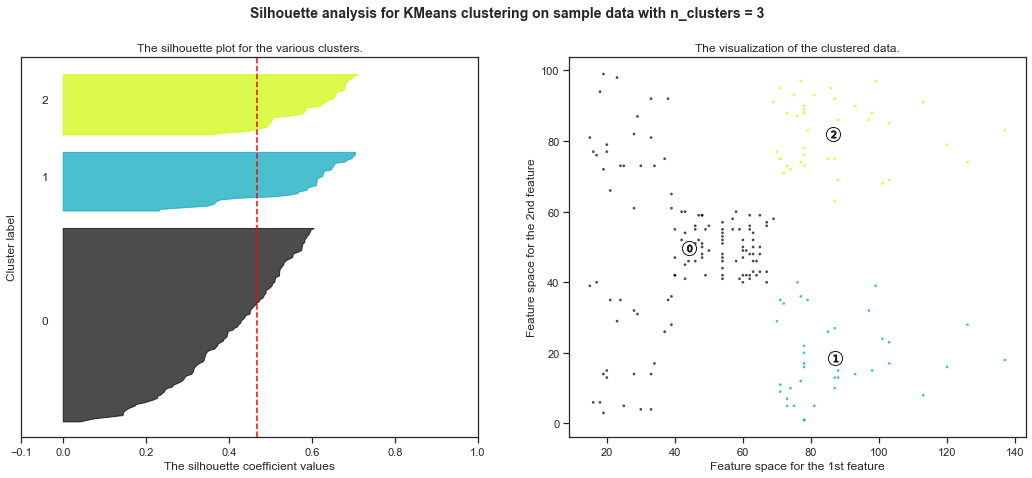

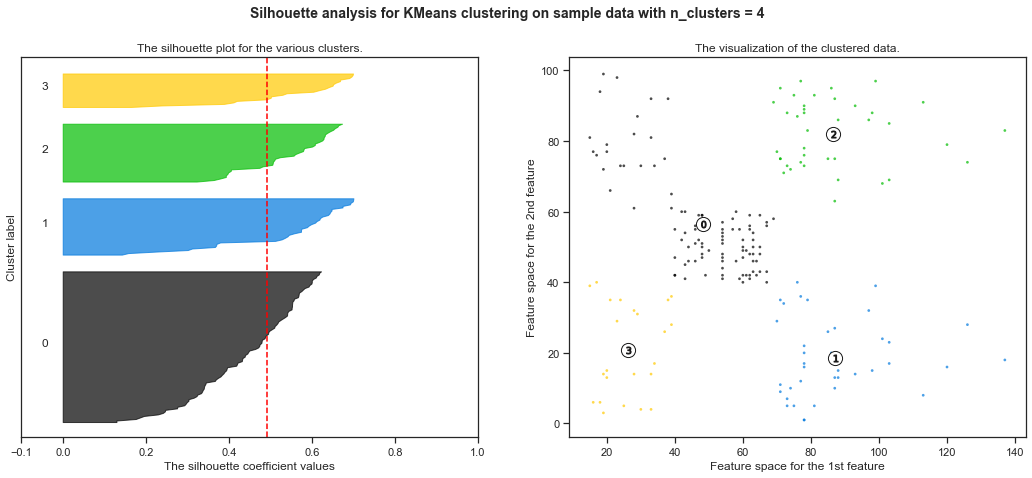

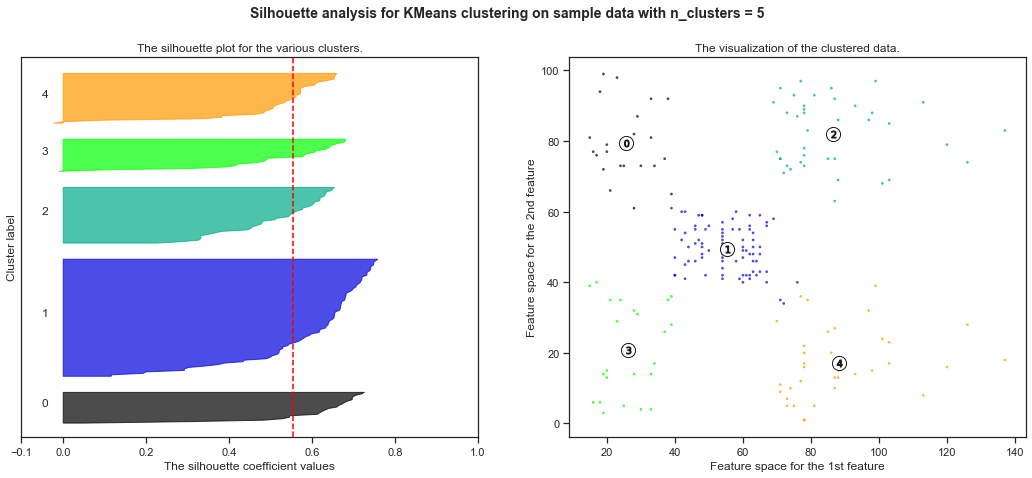

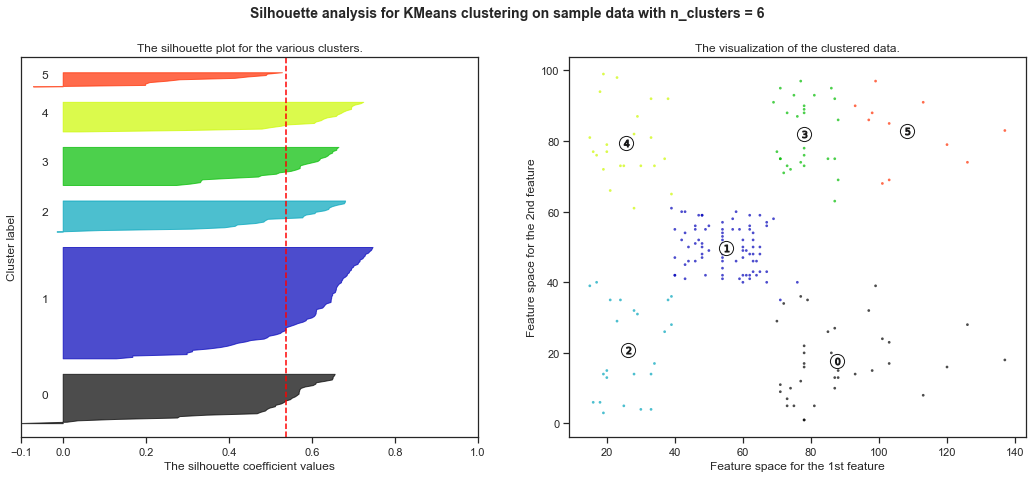

In [85]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcateمرزبندی them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
        
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )
    
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )
    
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()
    
    




# Clustering bis

Resume clustering by k-means with, this time, the optimal number of classes according to you (and according to the previous criteria).

Describe again the obtained clusters.